<a href="https://colab.research.google.com/github/charlesellis1/dylan/blob/main/BD_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis of Bob Dylan's Lyrics

by Charlie Ellis

##Part A: Preprocessing

In [1]:
pip install lyricsgenius

     |████████████████████████████████| 61kB 5.2MB/s 


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter 
import lyricsgenius as lg

In [3]:
genius = lg.Genius('fmMuhUGjoqw0SteoOjHVD4cRzVq4-ygRLs_repmxuQ6Ybo_Bf2pLqgq_DJp3gBbO')

In [4]:
artist = genius.search_artist("Bob Dylan", max_songs=2)
print(artist.songs)

Searching for songs by Bob Dylan...

Song 1: "Murder Most Foul"
Song 2: "Blowin’ in the Wind"

Reached user-specified song limit (2).
Done. Found 2 songs.
[Song(id, artist, ...), Song(id, artist, ...)]


In [5]:
album_list_total = ["Bob Dylan by Bob Dylan", 
                    "The Freewheelin' Bob Dylan", "The Times They Are A-Changin'", "Another Side of Bob Dylan",
                    "Bringing It All Back Home", "Highway 61 Revisited", "Blonde On Blonde", 
                    "John Wesley Harding", "Nashville Skyline", "Self Portrait", "New Morning",
                    "Pat Garrett & Billy the Kid", "Planet Waves", "Blood On The Tracks", "Desire", "Street-Legal", 
                    "Slow Train Coming", "Saved", "Shot of Love",
                    "Infidels", "Empire Burlesque", "Knocked Out Loaded", 
                    "Down in the Groove", "Oh Mercy", "Under The Red Sky", "Good As I Been To You", 
                    "World Gone Wrong", "Time Out of Mind", "Love and Theft", 
                    "Modern Times", "Together Through Life", "Christmas in the Heart", 
                    "Tempest", "Shadows in the Night", "Fallen Angels", "Triplicate", 
                    "Rough and Rowdy Ways"]
album_list_year = ['1962', 
                   '1963', '1964', '1964', 
                   '1965', '1965', '1966', 
                   '1967', '1969', '1970', '1970', 
                   '1973', '1974', '1975', '1976', '1978', 
                   '1979', '1980', '1981', 
                   '1983', '1985', '1986', 
                   '1988', '1989', '1990', '1992', 
                   '1993', '1997', '2001', 
                   '2006', '2009', '2009', 
                   '2012', '2015', '2016', '2017', 
                   '2020']



In [6]:
def clean_lyrics(df, column):
    """
    This function cleans the words without importance and fix the format of the  dataframe's column lyrics 
    parameters:
    df = dataframe
    column = name of the column to clean
    """
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
    df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
    df[column] = df[column].str.replace("\n"," ").str.replace(r"[^\w\d'\s]+","").str.replace("efil ym fo flah","")
    df[column] = df[column].str.strip()

    return df

In [7]:
# # Function that takes in a list of albums, and a list with the year that corresponds to the year in which
# # that album was made. Returns a data frame with the album, year, and cleaned lyrics.
# def get_album_lyrics(album_list, year_list):

#     #Initialize df
#     df = pd.DataFrame()

#     #Loop through all songs in list/album
#     for i in range(len(album_list)):
#         album=genius.search_album(album_list[i], "Bob Dylan")
#         album_row=album.to_text()
#         df=df.append([album_row], ignore_index=True)    
    
#     df=df.rename(columns={0: "lyrics"})

#     #Clean Lyrics 
#     df["lyrics"]= df["lyrics"].str.replace("\n", " ")
#     df["lyrics"] = df["lyrics"].str.replace(r"(\s*\[.*?\]\s*)"
#                                             , " ").str.strip()
#     df["lyrics"] = df["lyrics"].str.replace("\\'", " ")
#     df["lyrics"] = df['lyrics'].str.replace('[^\w\s]','')
#     df["lyrics"] = df["lyrics"].str.replace(' re ', "re ")
#     df["lyrics"] = df["lyrics"].str.replace(' ve ', "ve ")
#     df["lyrics"] = df["lyrics"].str.replace('n t ', "nt ")
#     df["lyrics"] = df["lyrics"].str.replace(' s ', 's ')
#     df["lyrics"] = df["lyrics"].str.replace(' ll ', "ll ")
#     df["lyrics"] = df["lyrics"].str.replace(' i m ', " im ")
#     df

#     #Put it all into one df
#     df["album"]=album_list
#     df['year']=year_list
#     df=df[["album", "year", "lyrics"]]

#     return df

In [8]:
# # Function that takes in a list of albums, and a list with the year that corresponds to the year in which
# # that album was made. Returns a data frame with the album, year, and cleaned lyrics.
# def get_album_lyrics(album_list, year_list):

#     #Initialize df
#     df = pd.DataFrame()

#     #Loop through all songs in list/album
#     for i in range(len(album_list)):
#         album=genius.search_album(album_list[i], "Bob Dylan")
#         album_row=album.to_text()
#         df=df.append([album_row], ignore_index=True)    
    
#     df=df.rename(columns={0: "lyrics"})

#     #Clean Lyrics 
#     df["lyrics"] = df["lyrics"].str.replace(r"(\s*\[.*?\]\s*)"
#                                             , " ").str.strip()
#     df["lyrics"] = df['lyrics'].str.replace('[^\w\s\'\?]','')
#     # df["lyrics"] = df['lyrics'].str.replace('[^\w\s]','')
#     df["lyrics"] = df["lyrics"].str.replace(' re ', "'re ")
#     df["lyrics"] = df["lyrics"].str.replace(' ve ', "'ve ")
#     df["lyrics"] = df["lyrics"].str.replace('n t ', "n't ")
#     df["lyrics"] = df["lyrics"].str.replace(' s ', "'s ")
#     df["lyrics"] = df["lyrics"].str.replace(' ll ', "'ll ")
#     df["lyrics"] = df["lyrics"].str.replace(' i m ', " i'm ")
#     df["lyrics"]= df["lyrics"].str.replace("\?\,", "?")
#     df["lyrics"]= df["lyrics"].str.replace("\n\n", "\n")
#     df["lyrics"]= df["lyrics"].str.replace("\n", ". ")

#     df

#     #Put it all into one df
#     df["album"]=album_list
#     df['year']=year_list
#     df=df[["album", "year", "lyrics"]]

#     return df



In [9]:
# Function that takes in a list of albums, and a list with the year that corresponds to the year in which
# that album was made. Returns a data frame with the album, year, and cleaned lyrics.
def get_album_lyrics(album_list, year_list):

    #Initialize df
    df = pd.DataFrame()

    #Loop through all songs in list/album
    for i in range(len(album_list)):
        album=genius.search_album(album_list[i], "Bob Dylan")
        album_row=album.to_text()
        df=df.append([album_row], ignore_index=True)    
    
    df=df.rename(columns={0: "lyrics"})

    #Clean Lyrics 
    clean_lyrics(df, "lyrics")

    #Put it all into one df
    df["album"]=album_list
    df['year']=year_list
    df=df[["album", "year", "lyrics"]]

    return df



In [10]:
#Try out function with just one album:

get_album_lyrics(["Bringing It All Back Home"], ['1964'])

Searching for "Bringing It All Back Home" by Bob Dylan...


,album,year,lyrics
0,Bringing It All Back Home,1964,johnny's in the basement mixin' up the medicin...


In [11]:
from google.colab import auth
from google.colab import drive
import json

run_API = False #A boolean that represents if we want to get our data through the API (true) or locally in files (false)

if run_API:
  
  #May need to run cell twice

  data = get_album_lyrics(album_list_total, album_list_year)

elif run_API == False:

  drive.mount('/content/drive')
  data = pd.read_json('/content/drive/MyDrive/Charlie Ellis/Coding/lyrics_data_3')


data.head(20)

Mounted at /content/drive


,album,year,decade,lyrics
0,Bob Dylan by Bob Dylan,1962,60s,what the world needs now is love sweet love it...
1,The Freewheelin' Bob Dylan,1963,60s,how many roads must a man walk down before you...
2,The Times They Are A-Changin',1964,60s,come gather 'round people wherever you roam an...
3,Another Side of Bob Dylan,1964,60s,i ain't lookin' to compete with you beat or ch...
4,Bringing It All Back Home,1965,60s,johnny's in the basement mixin' up the medicin...
5,Highway 61 Revisited,1965,60s,once upon a time you dressed so fine threw the...
6,Blonde On Blonde,1966,60s,well they'll stone you when you're tryin' to b...
7,John Wesley Harding,1967,60s,john wesley harding was a friend to the poor h...
8,Nashville Skyline,1969,60s,bob dylan if youre travelin' to the north coun...
9,Self Portrait,1970,70s,all the tired horses in the sun how'm i suppos...


In [12]:
#Save df to json file

drive.mount('/content/drive')
with open('/content/drive/MyDrive/Charlie Ellis/Coding/lyrics_data_3', 'w') as f:
  f.write(data.to_json())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
def add_decades(df):
  decades = []
  for year in df['year']:
      if 1960 <= year < 1970:
            decades.append("60s")
      if 1970 <= year < 1980:
            decades.append("70s")
      if 1980 <= year < 1990:
            decades.append("80s")
      if 1990 <= year < 2000:
            decades.append("90s")
      if 2000 <= year < 2010:
            decades.append("00s")
      if 2010 <= year :
            decades.append("10s")
  df['decade'] = decades
  df = df[['album', 'year', 'decade', 'lyrics']]
  return df

In [14]:
data["year"] = pd.to_numeric(data.year, errors='coerce')
data = add_decades(data)
data.head()

,album,year,decade,lyrics
0,Bob Dylan by Bob Dylan,1962,60s,what the world needs now is love sweet love it...
1,The Freewheelin' Bob Dylan,1963,60s,how many roads must a man walk down before you...
2,The Times They Are A-Changin',1964,60s,come gather 'round people wherever you roam an...
3,Another Side of Bob Dylan,1964,60s,i ain't lookin' to compete with you beat or ch...
4,Bringing It All Back Home,1965,60s,johnny's in the basement mixin' up the medicin...


##Part B: Sentiment Analysis

Using the Vader Sentiment Intensity Analyzer

In [15]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [16]:
def get_sentiment_score(album_text): 
    scores=sid.polarity_scores(str(album_text))
    return scores

def add_sentiment_scores(lyrics_df):
  new_df = lyrics_df
  new_df['Positive'] = ""
  new_df['Neutral'] = ""
  new_df['Negative'] = ""
  new_df['Compound'] = ""

  for i in np.arange(len(new_df)):
    score = get_sentiment_score(new_df['lyrics'][i])
    new_df['Positive'][i] = score['pos']
    new_df['Neutral'][i] = score['neu']
    new_df['Negative'][i] = score['neg']
    new_df['Compound'][i] = score['compound']

  return new_df



In [17]:
album_scores = add_sentiment_scores(data)
album_scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/i

,album,year,decade,lyrics,Positive,Neutral,Negative,Compound
0,Bob Dylan by Bob Dylan,1962,60s,what the world needs now is love sweet love it...,0.182,0.723,0.095,0.9998
1,The Freewheelin' Bob Dylan,1963,60s,how many roads must a man walk down before you...,0.137,0.744,0.119,0.9967
2,The Times They Are A-Changin',1964,60s,come gather 'round people wherever you roam an...,0.092,0.768,0.14,-0.9996
3,Another Side of Bob Dylan,1964,60s,i ain't lookin' to compete with you beat or ch...,0.134,0.745,0.121,0.9989
4,Bringing It All Back Home,1965,60s,johnny's in the basement mixin' up the medicin...,0.166,0.74,0.094,0.9999
5,Highway 61 Revisited,1965,60s,once upon a time you dressed so fine threw the...,0.12,0.774,0.106,0.9946
6,Blonde On Blonde,1966,60s,well they'll stone you when you're tryin' to b...,0.15,0.755,0.094,0.9998
7,John Wesley Harding,1967,60s,john wesley harding was a friend to the poor h...,0.163,0.703,0.134,0.9969
8,Nashville Skyline,1969,60s,bob dylan if youre travelin' to the north coun...,0.19,0.746,0.063,0.9997
9,Self Portrait,1970,70s,all the tired horses in the sun how'm i suppos...,0.133,0.777,0.09,0.9998


In [18]:
#Turn sentiment scores into real numbers
album_scores["Positive"] = pd.to_numeric(album_scores.Positive, errors='coerce')
album_scores["Negative"] = pd.to_numeric(album_scores.Negative, errors='coerce')
album_scores["Neutral"] = pd.to_numeric(album_scores.Neutral, errors='coerce')
album_scores["Compound"] = pd.to_numeric(album_scores.Compound, errors='coerce')

In [19]:
most_positive = pd.DataFrame(album_scores.sort_values("Positive", ascending=False)['album'])
print("The five most positive albums are:")
most_positive.head()

The five most positive albums are:


,album
35,Triplicate
34,Fallen Angels
17,Saved
31,Christmas in the Heart
8,Nashville Skyline


It's interesting to note that the two most positive albums are Fallen Angels (2016) and Triplicate (2017).

In [20]:
most_negative = pd.DataFrame(album_scores.sort_values("Negative", ascending=False)['album'])
print("The five most negative albums are:")
most_negative.head()

The five most negative albums are:


,album
15,Street-Legal
22,Down in the Groove
2,The Times They Are A-Changin'
7,John Wesley Harding
18,Shot of Love


##Data Visualization

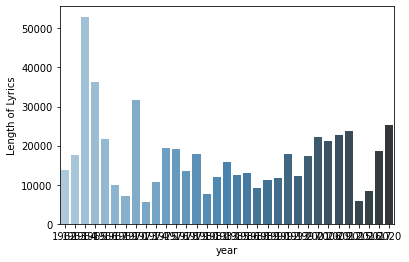

In [21]:
album_scores['Length of Lyrics'] = [len(lyric) for lyric in album_scores['lyrics']]
grouped_data_1 = album_scores.groupby("year").sum()

sns.barplot(x=grouped_data_1.index, y="Length of Lyrics", data=grouped_data_1, palette="Blues_d")
sns.set(rc={'figure.figsize':(21.7,8.27)})

Text(0, 0.5, 'Positive vs Negative Sentiment')

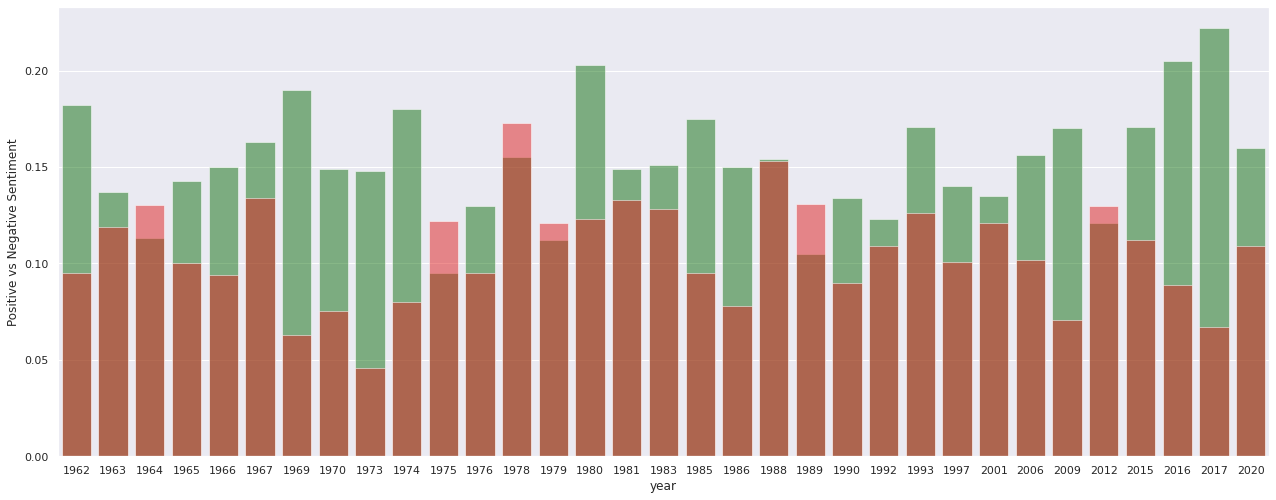

In [22]:
grouped_data_2 = album_scores.groupby("year").mean()
album_scores['year'] = album_scores["year"].astype(int)

sns.barplot(x=grouped_data_2.index, y="Positive", data=grouped_data_2, alpha=0.5, color='green')
sns.barplot(x=grouped_data_2.index, y="Negative", data=grouped_data_2, alpha=0.5, color='red')
sns.set(rc={'figure.figsize':(21.7,8.27)})
plt.ylabel("Positive vs Negative Sentiment")



In [23]:
data_grouped = data.groupby('decade').mean()
data_grouped

,year,Positive,Neutral,Negative,Compound,Length of Lyrics
decade,,,,,,
00s,2006.250000,0.157750,0.751250,0.091000,0.999125,16526.250000
10s,2016.000000,0.175800,0.722400,0.101400,0.600600,16350.400000
60s,1965.000000,0.148222,0.744222,0.107333,0.776300,17693.888889
70s,1974.375000,0.139750,0.761750,0.098500,0.252275,14789.625000
80s,1984.571429,0.155286,0.724286,0.120143,0.434771,11624.428571
90s,1993.000000,0.142000,0.751500,0.106500,0.998775,14770.000000


Text(0, 0.5, 'Positive vs. Negative Scores')

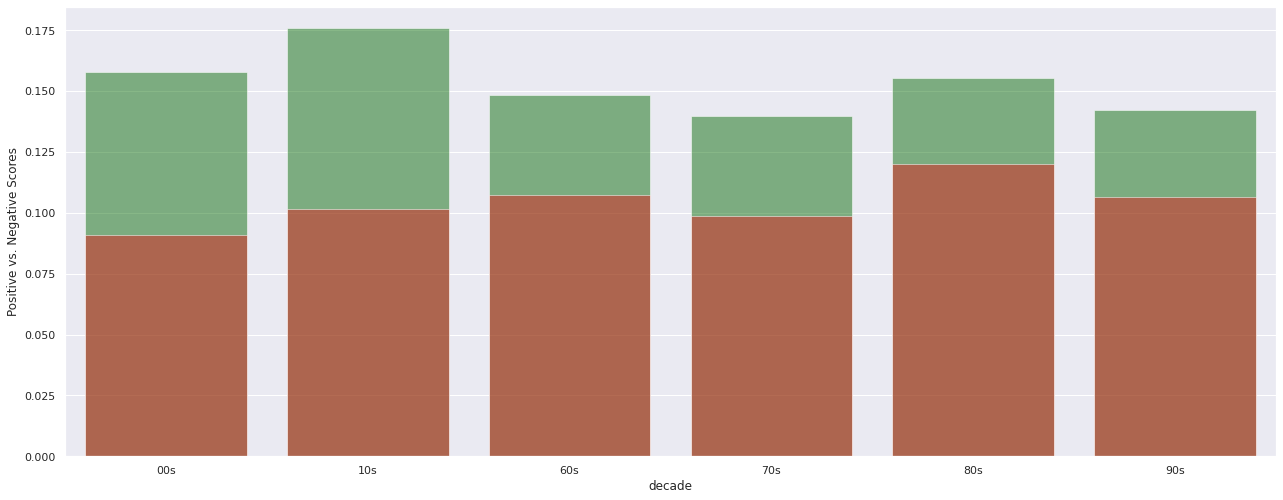

In [24]:
df = pd.DataFrame()

sns.barplot(x=data_grouped.index, y="Positive", data=data_grouped, alpha=0.5, color='green')
sns.barplot(x=data_grouped.index, y="Negative", data=data_grouped, alpha=0.5, color='red')
sns.set(rc={'figure.figsize':(15,6)})
plt.ylabel("Positive vs. Negative Scores")

In [25]:
# stone = genius.search_song("All Along the watchtower", "Bob Dylan")
# stone = stone.to_text()
# df = pd.DataFrame()
# df=df.append([stone], ignore_index=True)

# #Rename Lyrics Column
# df=df.rename(columns={0: "lyrics"})

# df['lyrics'][0]

In [26]:

# #Clean Lyrics 

# df["lyrics"] = df["lyrics"].str.replace(r"(\s*\[.*?\]\s*)", " ").str.strip()
# df["lyrics"] = df['lyrics'].str.replace('[^\w\s\'\?]','')
# df["lyrics"] = df["lyrics"].str.replace(' re ', "'re ")
# df["lyrics"] = df["lyrics"].str.replace(' ve ', "'ve ")
# df["lyrics"] = df["lyrics"].str.replace('n t ', "n't ")
# df["lyrics"] = df["lyrics"].str.replace(' s ', 's ')
# df["lyrics"] = df["lyrics"].str.replace(' ll ', "'ll ")
# df["lyrics"] = df["lyrics"].str.replace(' i m ', " i'm ")
# df["lyrics"]= df["lyrics"].str.replace("\n\n", "\n")
# df["lyrics"]= df["lyrics"].str.replace("\n", ". ")
# df["lyrics"]= df["lyrics"].str.replace("\?\,", "?")
# df['lyrics'][0]

In [27]:
# for i, sent in enumerate(en_doc.sentences):
#     print("[Sentence {}]".format(i+1))
#     for word in sent.words:
#         print("{:12s}\t{:12s}\t{:6s}\t{:d}\t{:12s}".format(\
#               word.text, word.lemma, word.pos, word.governor, word.dependency_relation))
#     print("")

In [28]:
# from wordcloud import WordCloud

# wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
# plt.figure(figsize=(12,10))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [29]:
pip install stanza

     |████████████████████████████████| 337kB 8.5MB/s 


In [30]:
import stanza
stanza.download('en')       # This downloads the English models for the neural pipeline
nlp = stanza.Pipeline('en') # This sets up a default neural pipeline in English
doc = nlp("Barack Obama was born in Hawaii.  He was elected president in 2008.")
doc.sentences[0].print_dependencies()

2021-07-04 09:58:58 INFO: Downloading default packages for language: en (English)...


2021-07-04 10:00:20 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-07-04 10:00:20 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-07-04 10:00:20 INFO: Use device: cpu
2021-07-04 10:00:20 INFO: Loading: tokenize
2021-07-04 10:00:20 INFO: Loading: pos
2021-07-04 10:00:21 INFO: Loading: lemma
2021-07-04 10:00:21 INFO: Loading: depparse
2021-07-04 10:00:21 INFO: Loading: sentiment
2021-07-04 10:00:22 INFO: Loading: ner
2021-07-04 10:00:22 INFO: Done loading processors!


('Barack', 4, 'nsubj:pass')
('Obama', 1, 'flat')
('was', 4, 'aux:pass')
('born', 0, 'root')
('in', 6, 'case')
('Hawaii', 4, 'obl')
('.', 4, 'punct')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [31]:
def get_stanza_score(album_text):
  doc = nlp(album_text)
  count = 0
  for i, sentence in enumerate(doc.sentences):
    count += sentence.sentiment
  return count

def add_stanza_score(df):
    
    df['score'] = ""

    for i in np.arange(len(df)):
      score = get_stanza_score(df['lyrics'][i])
      df['score'][i] = score

    return df


In [32]:
# data = pd.read_json('/content/drive/MyDrive/Charlie Ellis/Coding/lyrics_data_2')
# data = add_decades(data)
# data = data[['album', 'year', 'decade', 'lyrics']]

# data = add_stanza_score(data)
# data.head()

In [33]:
# drive.mount('/content/drive')
# with open('/content/drive/MyDrive/Charlie Ellis/Coding/stanza_scores', 'w') as f:
#   f.write(data.to_json())

In [34]:
data = pd.read_json('/content/drive/MyDrive/Charlie Ellis/Coding/stanza_scores')
data.head()

,album,year,decade,lyrics,score,lyric_length,average_sentiment_per_lyric
0,Bob Dylan by Bob Dylan,1962,60s,What the world needs now is love sweet love. I...,345,14246,0.024217
1,The Freewheelin' Bob Dylan,1963,60s,How many roads must a man walk down. Before yo...,391,17935,0.021801
2,The Times They Are A-Changin',1964,60s,Come gather 'round people wherever you roam. A...,405,16053,0.025229
3,Another Side of Bob Dylan,1964,60s,I ain't lookin' to compete with you. Beat or c...,1168,38497,0.030340
4,Bringing It All Back Home,1965,60s,Johnny's in the basement mixin' up the medicin...,442,20098,0.021992


In [35]:
data['year'] = [str(yr) for yr in data['year']]
data['album_name'] = data['album'] + " " + "(" + data['year'] + ")"
data.head()

,album,year,decade,lyrics,score,lyric_length,average_sentiment_per_lyric,album_name
0,Bob Dylan by Bob Dylan,1962,60s,What the world needs now is love sweet love. I...,345,14246,0.024217,Bob Dylan by Bob Dylan (1962)
1,The Freewheelin' Bob Dylan,1963,60s,How many roads must a man walk down. Before yo...,391,17935,0.021801,The Freewheelin' Bob Dylan (1963)
2,The Times They Are A-Changin',1964,60s,Come gather 'round people wherever you roam. A...,405,16053,0.025229,The Times They Are A-Changin' (1964)
3,Another Side of Bob Dylan,1964,60s,I ain't lookin' to compete with you. Beat or c...,1168,38497,0.030340,Another Side of Bob Dylan (1964)
4,Bringing It All Back Home,1965,60s,Johnny's in the basement mixin' up the medicin...,442,20098,0.021992,Bringing It All Back Home (1965)


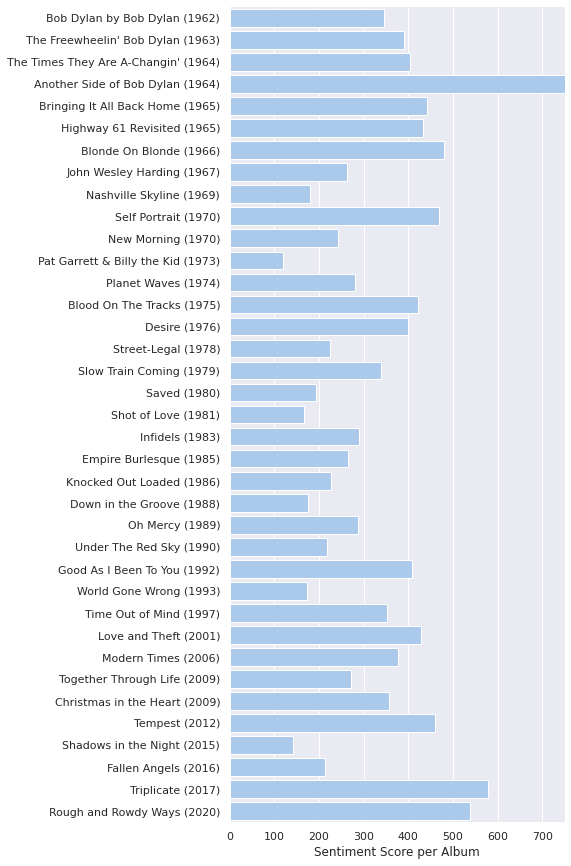

In [36]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="score", y="album_name", data=data,
            label="Sentiment Score", color="b")

# Add a legend and informative axis label
ax.set(xlim=(0, 750), ylabel="",
       xlabel="Sentiment Score per Album")
sns.despine(left=True, bottom=True)

In [37]:
data['lyric_length'] = [len(lyric) for lyric in data['lyrics']]
data['average_sentiment_per_lyric'] = data['score'] / data['lyric_length']


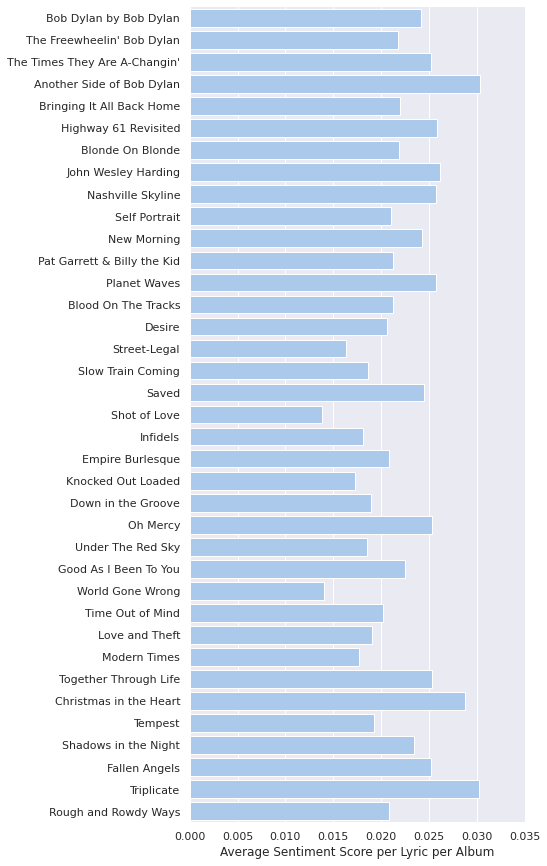

In [38]:
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="average_sentiment_per_lyric", y="album", data=data,
            label="Sentiment Score", color="b")

# Add a legend and informative axis label
ax.set(xlim=(0, 0.035), ylabel="",
       xlabel="Average Sentiment Score per Lyric per Album")
sns.despine(left=True, bottom=True)

Text(0, 0.5, 'Stanza Sentiment Score')

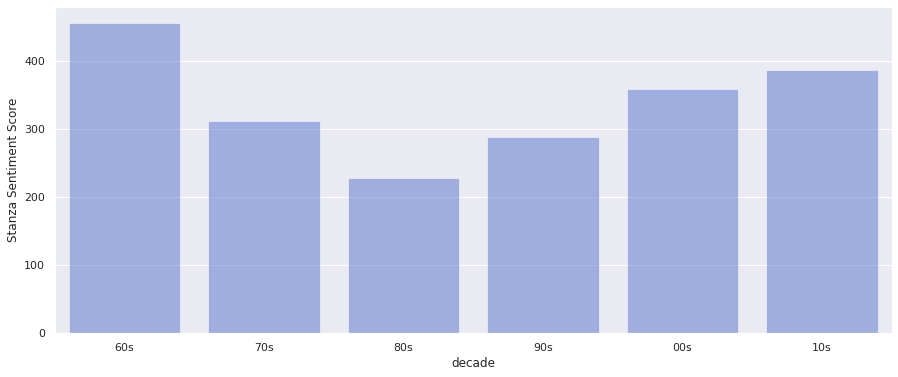

In [39]:
pd.to_numeric(data.score, errors='coerce')
data_grouped_stanza = data.groupby('decade', ).mean()
data_grouped_stanza = data_grouped_stanza.reindex(["60s", "70s", "80s", "90s", "00s", "10s"])

sns.barplot(x=data_grouped_stanza.index, y="score", data=data_grouped_stanza, alpha=0.5, color='royalblue')
sns.set(rc={'figure.figsize':(15,6)})
plt.ylabel("Stanza Sentiment Score")

##Part D: Analyzing Vocabulary

In [40]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet') 
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [41]:
df = pd.read_json('/content/drive/MyDrive/Charlie Ellis/Coding/lyrics_data_3')
df.head()

,album,year,decade,lyrics
0,Bob Dylan by Bob Dylan,1962,60s,what the world needs now is love sweet love it...
1,The Freewheelin' Bob Dylan,1963,60s,how many roads must a man walk down before you...
2,The Times They Are A-Changin',1964,60s,come gather 'round people wherever you roam an...
3,Another Side of Bob Dylan,1964,60s,i ain't lookin' to compete with you beat or ch...
4,Bringing It All Back Home,1965,60s,johnny's in the basement mixin' up the medicin...


In [42]:
def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word
    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [43]:
#Create unique list of words
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [44]:
#Stores unique words of each lyrics song into a new column called words 

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df = df.reset_index(drop=True)
for word in df['lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

#create the new column with the information of words lists 
df['words'] = words

In [45]:
df.head()

,album,year,decade,lyrics,words
0,Bob Dylan by Bob Dylan,1962,60s,what the world needs now is love sweet love it...,"[world, need, love, sweet, thing, there, littl..."
1,The Freewheelin' Bob Dylan,1963,60s,how many roads must a man walk down before you...,"[many, road, must, man, walk, call, sea, white..."
2,The Times They Are A-Changin',1964,60s,come gather 'round people wherever you roam an...,"[come, gather, round, people, wherever, roam, ..."
3,Another Side of Bob Dylan,1964,60s,i ain't lookin' to compete with you beat or ch...,"[aint, lookin, compete, beat, cheat, mistreat,..."
4,Bringing It All Back Home,1965,60s,johnny's in the basement mixin' up the medicin...,"[johnny, basement, mixin, medicine, im, paveme..."


In [46]:
#Create a new dataframe of all the  words used in lyrics and its decades 

#list used to store the information
set_words = []
set_decades = []

#Iterate trought each word and decade and stores them into the new lists
for i in df.index:
    for word in df['words'].iloc[i]:
        set_words.append(word)
        set_decades.append(df['decade'].iloc[i])

#create the new data frame  with the information of words and decade lists 
words_df = pd.DataFrame({'words':set_words,'decade':set_decades})

In [47]:
#Defined  your own Stopwords in case the clean data function does not remove all of them
stop_words = ['verse','im','get', '00', '1000','58','60','80','youre','youve',
               'guitar','solo','instrumental','intro','pre',"3","yo","yeah", 
              "dont", "cant", "aint"]

# count the frequency of each word that don't have on the stop_words lists          
cv = CountVectorizer(stop_words=stop_words)

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['decade'] = words_df['decade']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv('words.csv',index=False)

#change the order of columns to order from the oldest to actual decade
vect_words = vect_words[['words','60s', '70s','80s','90s','00s','10s']]

In [48]:
vect_words

,words,60s,70s,80s,90s,00s,10s
0,40,1,0,0,0,0,1
1,44,0,1,0,0,0,1
2,45,0,0,0,0,0,1
3,49,0,1,0,0,0,0
4,4nd,1,0,0,0,0,0
...,...,...,...,...,...,...,...
7187,zero,1,0,0,0,0,0
7188,zhukov,0,0,0,0,0,1
7189,zimmy,0,1,0,0,0,0
7190,zone,0,0,0,0,0,1


In [49]:
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))
         total_news.append(main_df['decade'][main_df['decade']==value].count())
    
    data = pd.DataFrame({'decade':years,'unique words':unique_words,'total words':total_words,'total albums':total_news})
    data['words per album'] = round(data['total words'] / data['total albums'],0)
    data['words per album'] = data['words per album'].astype('int')
    return data

def plot_freq_words(df,decade,n_words):
    
    top_words_2020 = df.sort_values([decade],ascending=False).head(n_words)

    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[1]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[2]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[3]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[4]])

    plt.legend(df.columns[1:].tolist())
    plt.title(f"Most frequent words in {decade} compared with other decades",fontsize=14)
    plt.xlabel(f'Most Frequent Words of {decade}',fontsize=12)
    plt.ylabel('Frecuency',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.savefig("lineplot.png",format="png", bbox_inches='tight')
    plt.show()

In [50]:
words_stats(vect_words,df)

,decade,unique words,total words,total albums,words per album
0,60s,3785,7557,9,840
1,70s,2904,5361,8,670
2,80s,2143,3952,7,565
3,90s,1650,2492,4,623
4,00s,1910,2866,4,716
5,10s,2321,3633,5,727


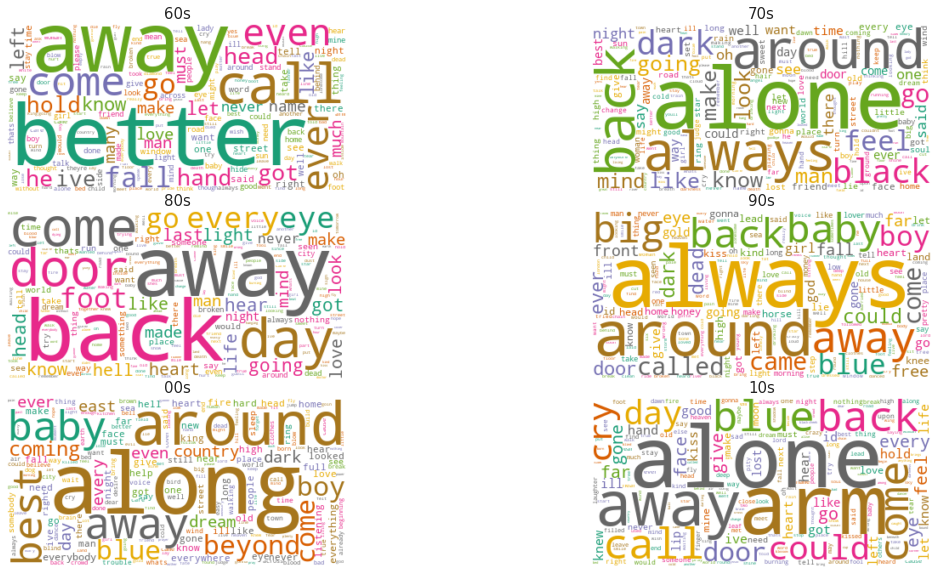

In [51]:
plot_wordcloud(vect_words,3,2)

##Helpful Links

[GitHub](https://github.com/charlesellis1/dylan)

[Lucidchart](https://lucid.app/lucidchart/b4883282-b282-44f3-a786-b2d6ee0b7067/edit?viewport_loc=-1429%2C267%2C6422%2C2680%2C0_0&invitationId=inv_c751cc40-f0ba-43cb-bb59-b6a0ab8f3404)

[Google SlideDeck](https://docs.google.com/presentation/d/1H6rQ7MT4H4wWP_7XCQcv4dNEouV4k5niGZD0JlDUfqk/edit#slide=id.ge376ecf440_0_103)
